**call API yahoo finance**

In [1]:
# call API yahoo finance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import os

In [2]:
# Lấy mã aapl(mã cổ phiếu) từ yf
if os.path.exists("apple_stock_data_20y.csv"):
    aapl = pd.read_csv("apple_stock_data_20y.csv", index_col=0)
else:
    aapl = yf.Ticker("AAPL")
    aapl = aapl.history(period="max")
    aapl.to_csv("apple_stock_data_20y.csv")

In [3]:
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-16 00:00:00-04:00,212.360001,212.570007,209.770004,211.259995,54737900,0.0,0.0
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,0.0,0.0
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,0.0,0.0


In [4]:
# danh sách mốc thời
aapl.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2025-05-09 00:00:00-04:00', '2025-05-12 00:00:00-04:00',
               '2025-05-13 00:00:00-04:00', '2025-05-14 00:00:00-04:00',
               '2025-05-15 00:00:00-04:00', '2025-05-16 00:00:00-04:00',
               '2025-05-19 00:00:00-04:00', '2025-05-20 00:00:00-04:00',
               '2025-05-21 00:00:00-04:00', '2025-05-22 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=11202, freq=None)

**Clearning marker data and visualizing**

<Axes: xlabel='Date'>

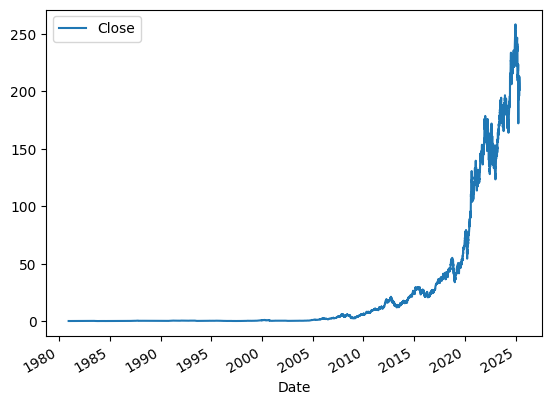

In [5]:
# Biểu đồ line lấy trục y là giá đóng cửa trục x là năm
aapl.plot.line(y="Close", use_index=True)

In [6]:
# Xóa Dividends và Stock Splits, Capital Gains
del aapl["Dividends"]
del aapl["Stock Splits"]


**Setting up our target for machine learning**

In [7]:
# Thêm cột Tomorrow( dự đoán giá ngày mai (tomorrow) là lấy giá close ngày hôm nay dịch lên 1 )
aapl["Tomorrow"] = aapl["Close"].shift(-1)

In [8]:
aapl

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.093453
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.086594
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.088737
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.091310
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.096882
...,...,...,...,...,...,...
2025-05-16 00:00:00-04:00,212.360001,212.570007,209.770004,211.259995,54737900,208.779999
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,206.860001
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,202.089996


In [9]:
aapl["Target"] = (aapl["Tomorrow"] > aapl["Close"]). astype(int)

In [10]:
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098597,0.099025,0.098597,0.098597,469033600,0.093453,0
1980-12-15 00:00:00-05:00,0.093881,0.093881,0.093453,0.093453,175884800,0.086594,0
1980-12-16 00:00:00-05:00,0.087022,0.087022,0.086594,0.086594,105728000,0.088737,1
1980-12-17 00:00:00-05:00,0.088737,0.089165,0.088737,0.088737,86441600,0.091310,1
1980-12-18 00:00:00-05:00,0.091310,0.091738,0.091310,0.091310,73449600,0.096882,1
...,...,...,...,...,...,...,...
2025-05-16 00:00:00-04:00,212.360001,212.570007,209.770004,211.259995,54737900,208.779999,0
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,206.860001,0
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,202.089996,0


In [11]:
# Data quá cũ k hữu ích lấy data gần đây
aapl = aapl.loc["2010-01-01":].copy()

In [12]:
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.414466,6.446624,6.382909,6.431898,493729600,6.443017,1
2010-01-05 00:00:00-05:00,6.449629,6.479382,6.409055,6.443017,601904800,6.340529,0
2010-01-06 00:00:00-05:00,6.443014,6.468560,6.333917,6.340529,552160000,6.328810,0
2010-01-07 00:00:00-05:00,6.363974,6.371487,6.282827,6.328810,477131200,6.370886,1
2010-01-08 00:00:00-05:00,6.320395,6.371487,6.283128,6.370886,447610800,6.314685,0
...,...,...,...,...,...,...,...
2025-05-16 00:00:00-04:00,212.360001,212.570007,209.770004,211.259995,54737900,208.779999,0
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,206.860001,0
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,202.089996,0


**Training machine learning modal**

In [13]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = aapl.iloc[:-100]
test = aapl.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
# lấy data frame của 100 ngày cuối và huẩn luyện model đoán cho ra target
preds = model.predict(test[predictors])
# xử lí từ mảng cho về panda Series giữ lại các thứ ngày tháng năm
preds = pd.Series(preds, index = test.index)
preds


,0
Date,
2024-12-27 00:00:00-05:00,1
2024-12-30 00:00:00-05:00,1
2024-12-31 00:00:00-05:00,1
2025-01-02 00:00:00-05:00,1
2025-01-03 00:00:00-05:00,1
...,...
2025-05-16 00:00:00-04:00,1
2025-05-19 00:00:00-04:00,1
2025-05-20 00:00:00-04:00,1


In [15]:
# chấm điểm kết quả dư đoán(kết quả thật,dự đoán)
precision_score(test["Target"], preds)

0.43956043956043955

**Buiding and backtesting**

In [16]:

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [17]:
def backtest(data, model, predictors, start=2000, step=200):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [18]:
predictions = backtest(aapl, model, predictors)

In [19]:
predictions["Predictions"].value_counts()

,count
Predictions,
0,1289
1,582


In [20]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5120274914089347

In [21]:
predictions["Target"].value_counts() / predictions.shape[0]


,count
Target,
1,0.533939
0,0.466061


**feature engineering**

In [22]:
#các khoảng thời gian (số ngày)
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = aapl.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    aapl[ratio_column] = aapl["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    aapl[trend_column] = aapl.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [23]:
aapl = aapl.dropna(subset=aapl.columns[aapl.columns != "Tomorrow"])
aapl

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2013-12-23 00:00:00-05:00,17.655020,17.739565,17.492147,17.719984,501306400,17.644766,0,1.018827,2.0,1.029292,2.0,1.087801,33.0,1.223619,126.0,1.402980,528.0
2013-12-24 00:00:00-05:00,17.713769,17.775624,17.593789,17.644766,167554800,17.527582,0,0.997873,1.0,1.020251,2.0,1.079965,33.0,1.217743,125.0,1.395787,527.0
2013-12-26 00:00:00-05:00,17.658130,17.701646,17.511419,17.527582,204008000,17.409161,0,0.996668,0.0,1.008715,2.0,1.070120,32.0,1.208962,125.0,1.385291,527.0
2013-12-27 00:00:00-05:00,17.525100,17.543438,17.390823,17.409161,225884400,17.236029,0,0.996610,0.0,0.996328,2.0,1.060429,31.0,1.200373,124.0,1.374727,527.0
2013-12-30 00:00:00-05:00,17.327413,17.409160,17.167647,17.236029,253629600,17.438066,1,0.995003,0.0,0.984494,1.0,1.047440,31.0,1.188242,123.0,1.359889,526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-16 00:00:00-04:00,212.360001,212.570007,209.770004,211.259995,54737900,208.779999,0,0.999551,0.0,0.997677,2.0,0.989315,29.0,0.949367,145.0,1.200648,532.0
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,206.860001,0,0.994096,0.0,0.987840,1.0,0.980491,29.0,0.937889,144.0,1.185983,532.0
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,202.089996,0,0.995381,0.0,0.984410,0.0,0.974519,28.0,0.928985,143.0,1.174525,532.0


**Improving model**

In [24]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [25]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [26]:
predictions = backtest(aapl, model, new_predictors)
predictions["Predictions"].value_counts()

,count
Predictions,
0.0,732
1.0,139


In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5035971223021583

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.523536
0,0.476464


In [29]:
predictions

,Target,Predictions
Date,,
2021-12-02 00:00:00-05:00,0,0.0
2021-12-03 00:00:00-05:00,1,0.0
2021-12-06 00:00:00-05:00,1,0.0
2021-12-07 00:00:00-05:00,1,0.0
2021-12-08 00:00:00-05:00,0,0.0
...,...,...
2025-05-16 00:00:00-04:00,0,0.0
2025-05-19 00:00:00-04:00,0,0.0
2025-05-20 00:00:00-04:00,0,0.0
